In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# Check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.7.2


In [2]:

# Fetching Data

df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [4]:
df_can.shape

(195, 39)

In [5]:

# Setting the country name as index
df_can.set_index("Country", inplace = True)

df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [6]:

print('data dimension: ', df_can.shape)

data dimension:  (195, 38)


In [7]:


# Creating a list of years from 1980 - 2013
years = list(map(str, range(1980,  2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [8]:

#          AREA PLOTS


In [10]:
df_can.sort_values(['Total'], ascending = False, axis=0, inplace = True)

# getting the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


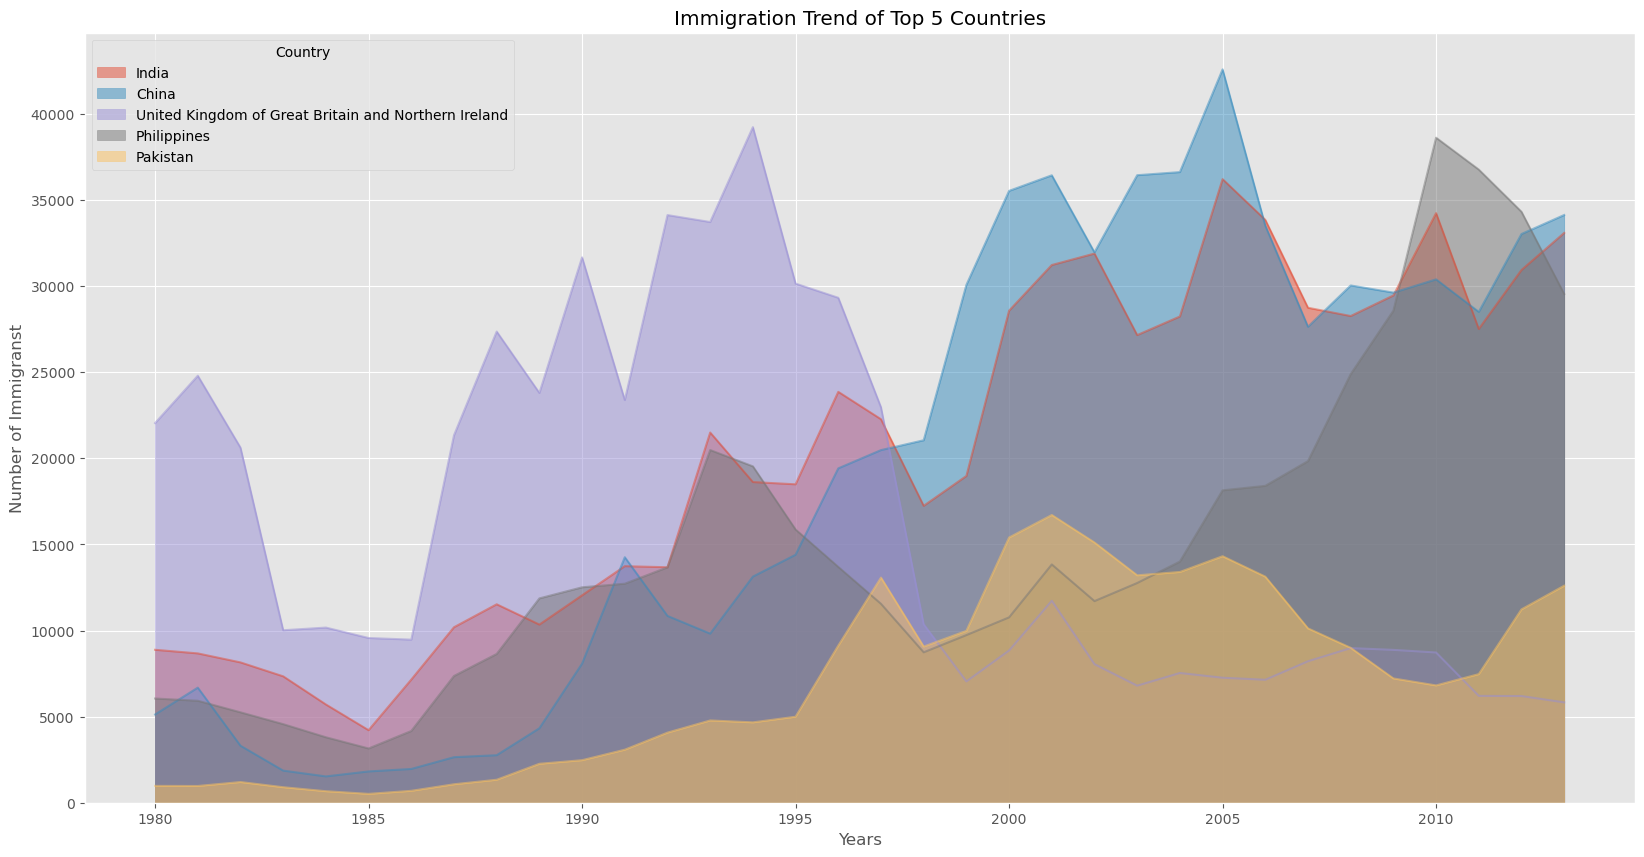

In [11]:

# Changing the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area', stacked = False, figsize =(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigranst')
plt.xlabel('Years')

plt.show()

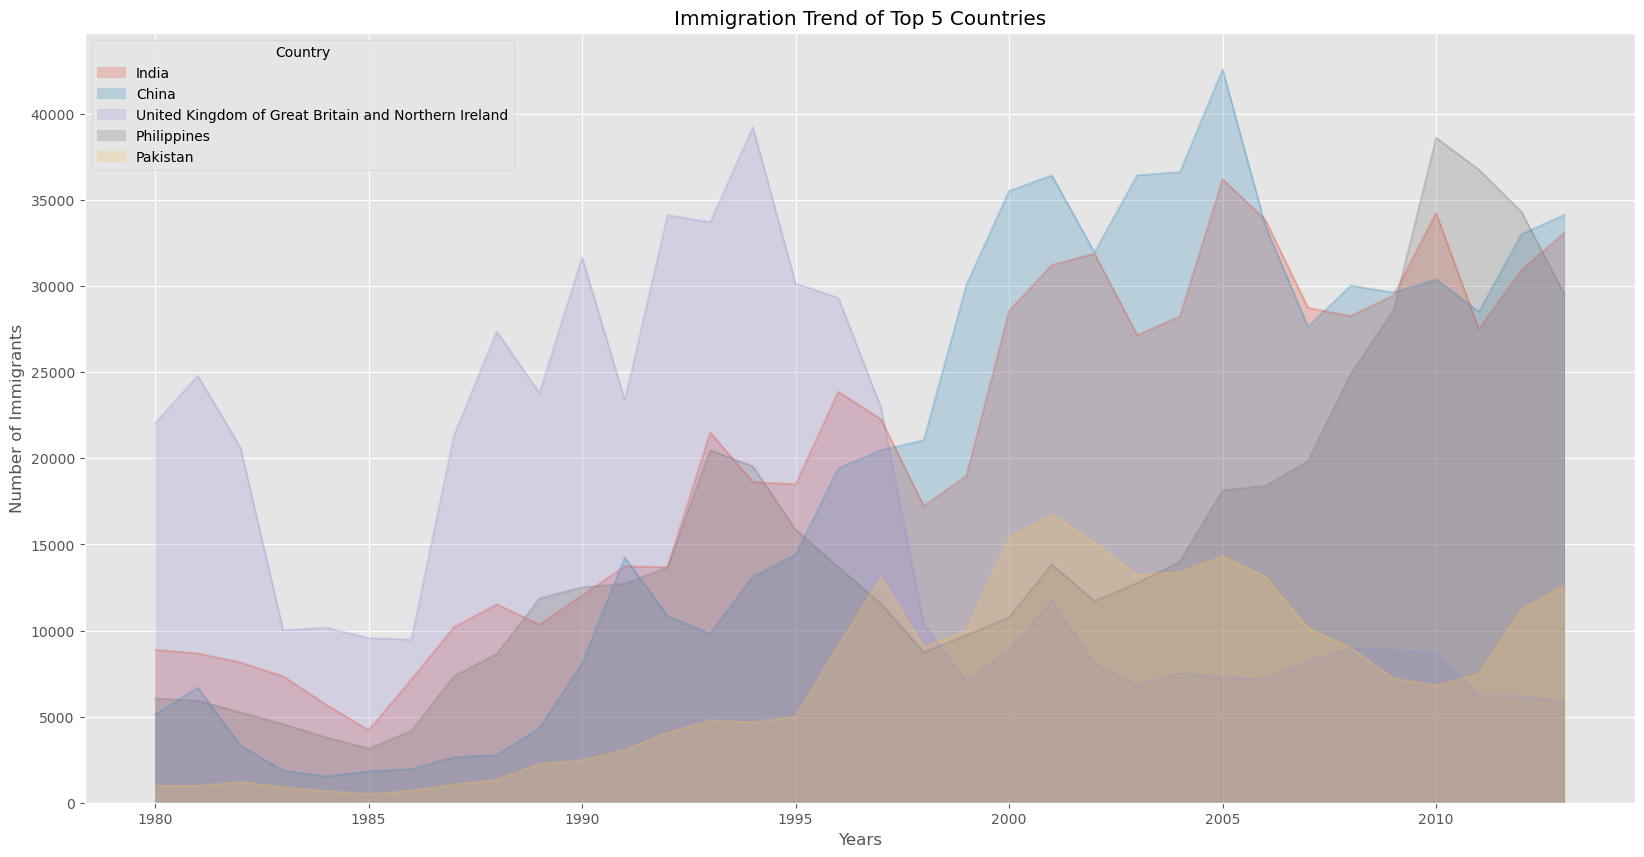

In [12]:

# the unstacked plot (area plot) above has a default transparency (alpha value) at 0.5.
# We can modify this value by passing in the alpha parameter below:

df_top5.plot(kind= 'area',
             alpha = 0.25,
             stacked = False,
             figsize = (20,10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [13]:


#                  TWO TYPES OF PLOTTING

#  Artist Layer and Scripting Layer  

In [14]:

# USING Scripting layer (procedural method) 
# i.e using matplotlib.pyplot as 'plt'


Text(0.5, 0, 'Years')

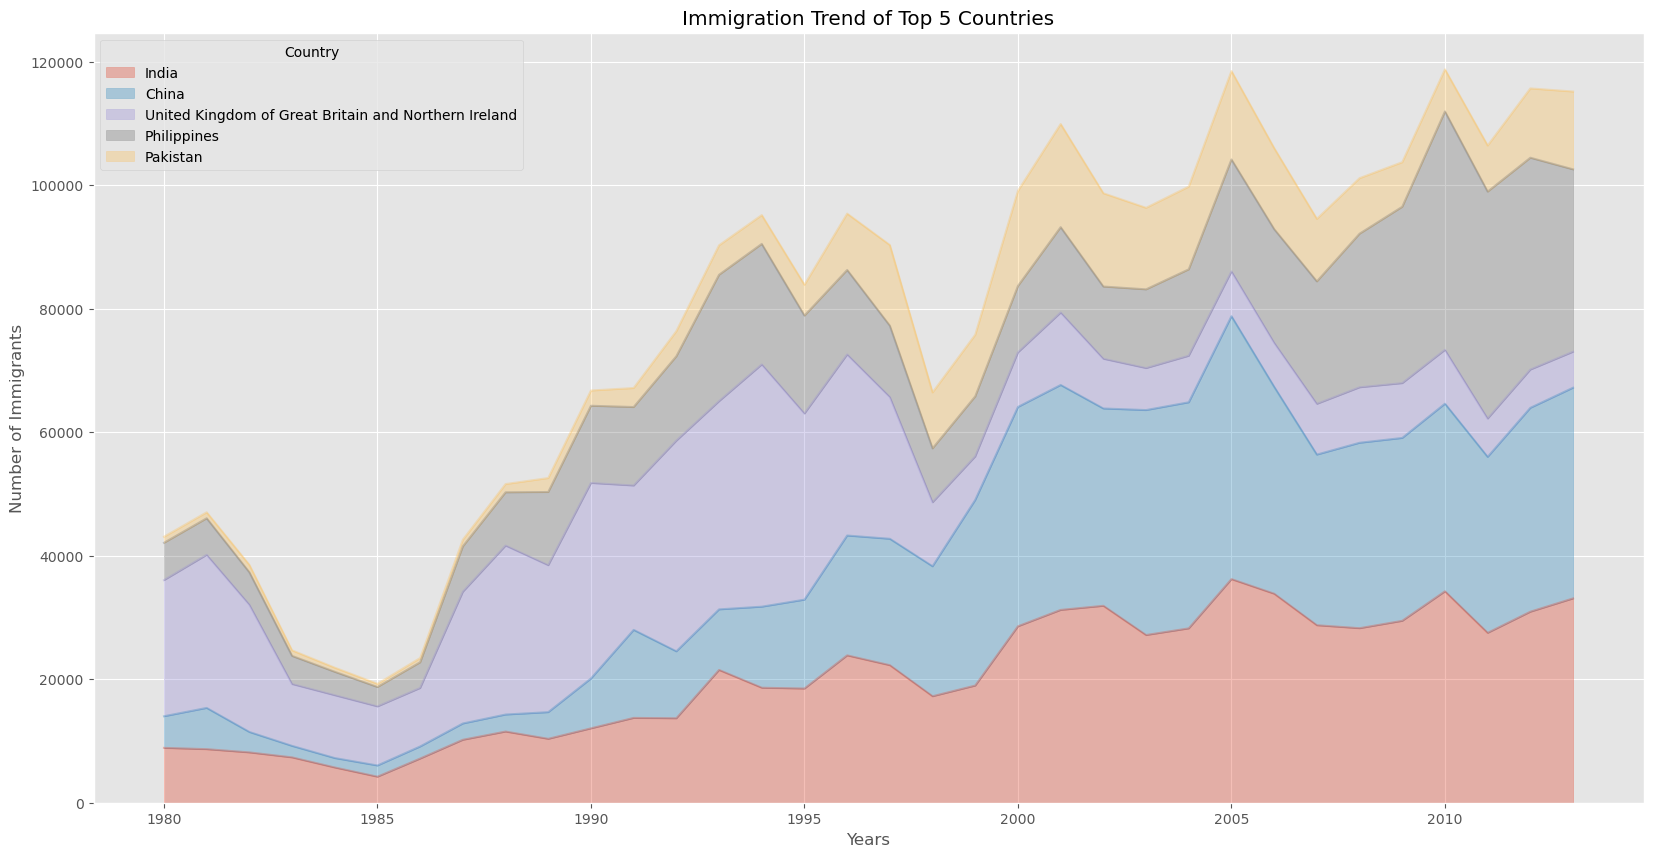

In [16]:


# OPTION 2: Artist Layer (Object Oriented method)
# using 'Axes' instance from Matplotlib

ax = df_top5.plot(kind='area', alpha = 0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel("Number of Immigrants")
ax.set_xlabel('Years')

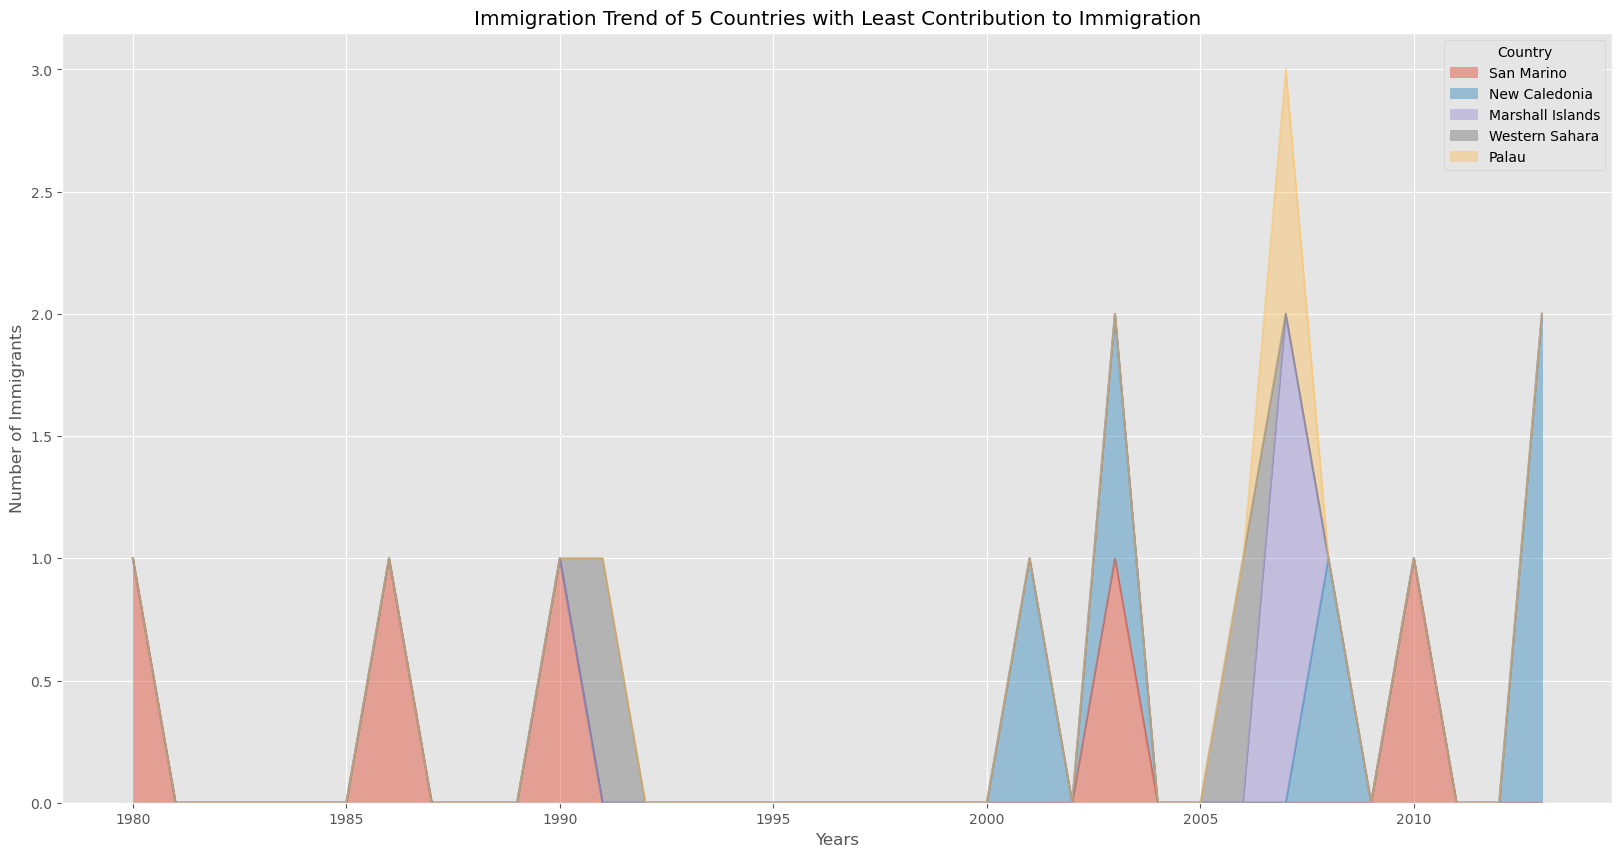

In [28]:


# Using the scripting layer to create a stacked area plot of 
# the 5 countries that contributed the least to immigration to Canada from 1980 to 2013.
# Using a transparency value of 0.45

df_least5 = df_can.tail(5) # gets the 5 countries with the least contribution

# transpose the dataframe
df_least5 = df_least5[years].transpose()
df_least5.head()

df_least5.index = df_least5.index.map(int)

df_least5.plot(kind='area', alpha = 0.45, figsize=(20,10))

plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()



Text(0.5, 0, 'Years')

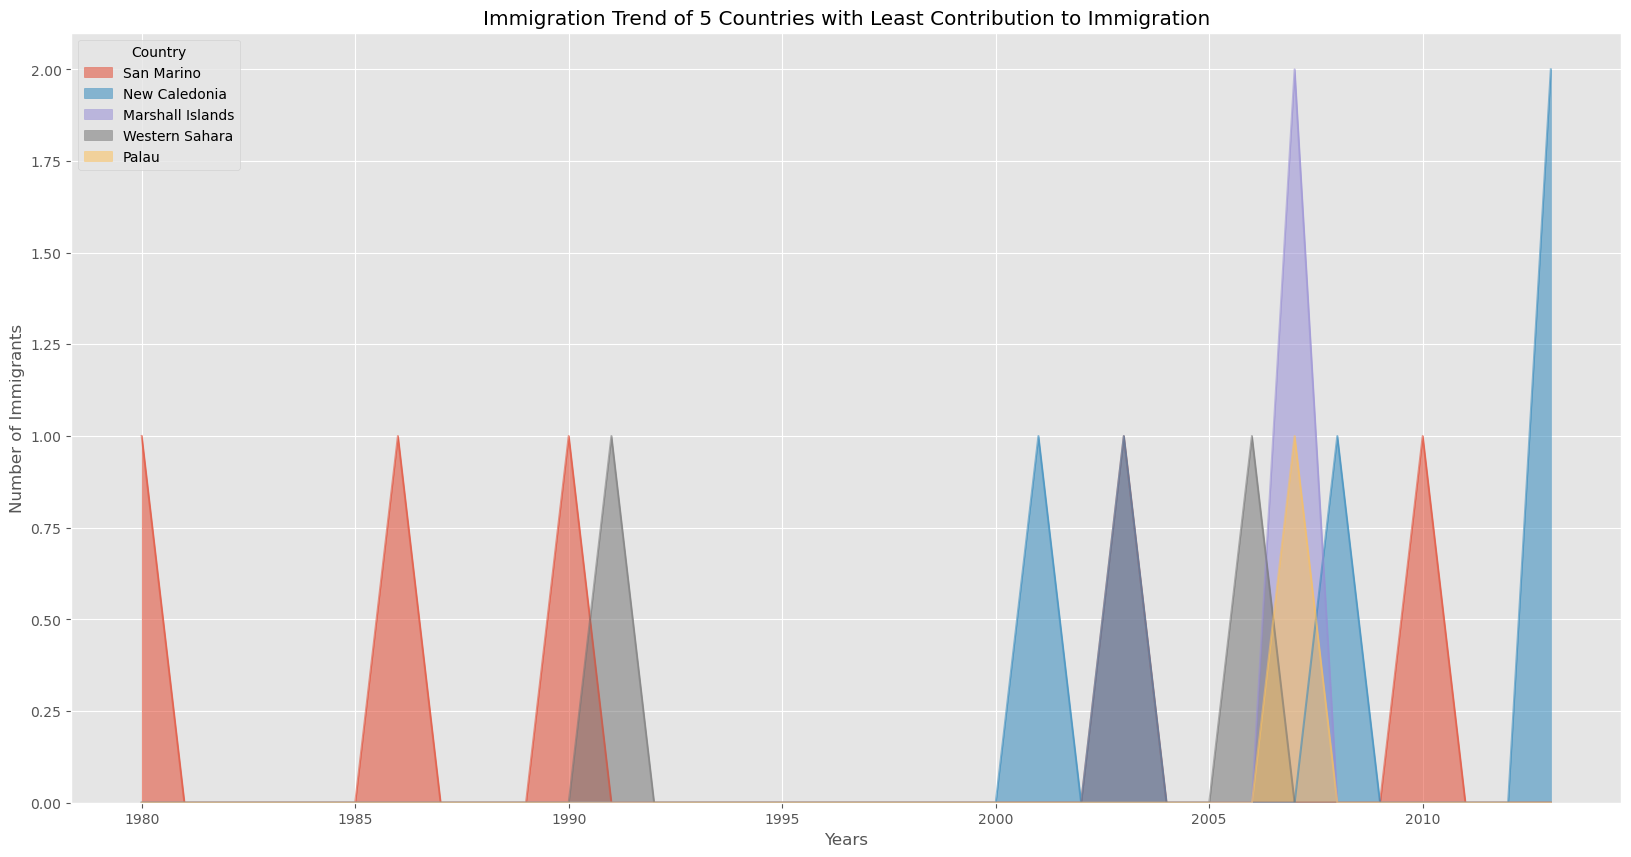

In [29]:

# Using the artist layer to create an unstacked area plot of the 5 countries that
# contributed the least to immigration to Canada from 1980 to 2013. 
# Using transparency value of 0.55 :

df_least5 = df_can.tail(5)

# transpose the dataframe
df_least5 = df_least5[years].transpose() 

df_least5.head()

df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting

ax = df_least5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))

ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

###### #  

#                     HISTOGRAM

###### Question: What is the frequency distribution of the number (population) of new immigrants form the various countries to Canada in 2013?



In [34]:
df_can['2013']

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [35]:

count, bin_edges = np.histogram(df_can['2013'])

print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


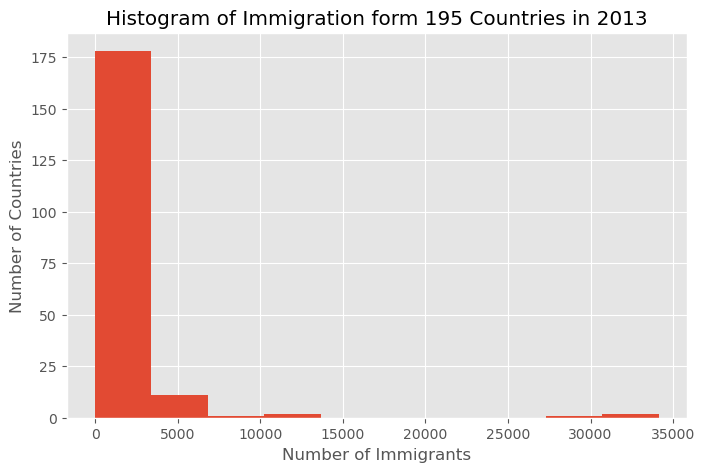

In [36]:

# Graphing this distribution by passing kind = hist to plot()

df_can['2013'].plot(kind='hist', figsize = (8,5))

plt.title('Histogram of Immigration form 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
plt.show()

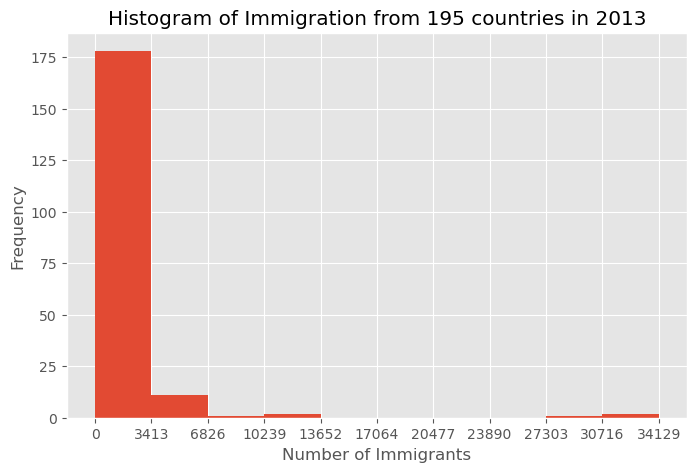

In [37]:
# Matching the bin size to that of the x-axis lavels:

count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize = (8,5), xticks = bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013')
plt.xlabel('Number of Immigrants') 

plt.show()

###### One could use : df_can['2013'].plot.hist() instead


In [39]:

# The immigration distribution for Denmark, Norway,
# and Sweden for years 1980 - 2013

df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<Axes: ylabel='Frequency'>

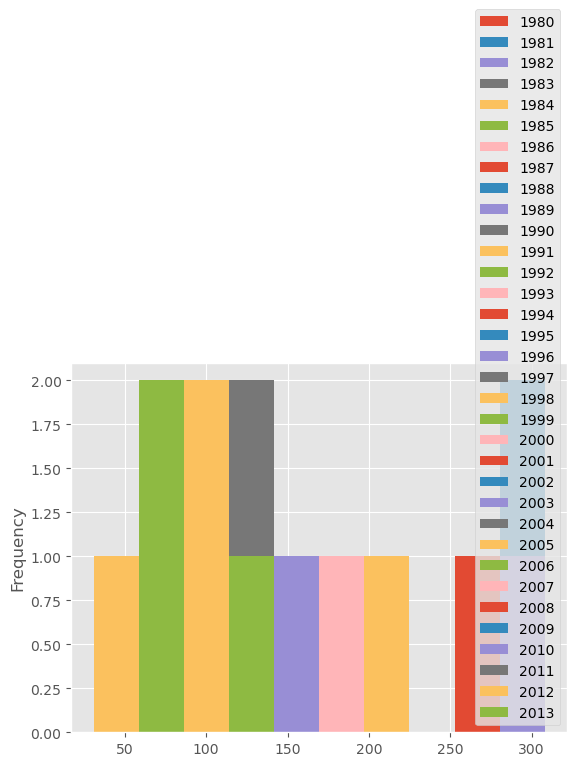

In [40]:
# Generating Histogram:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

In [41]:
# As the above does not seem right, the need to tranpose the 
# dataset will be put to effect below:

df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


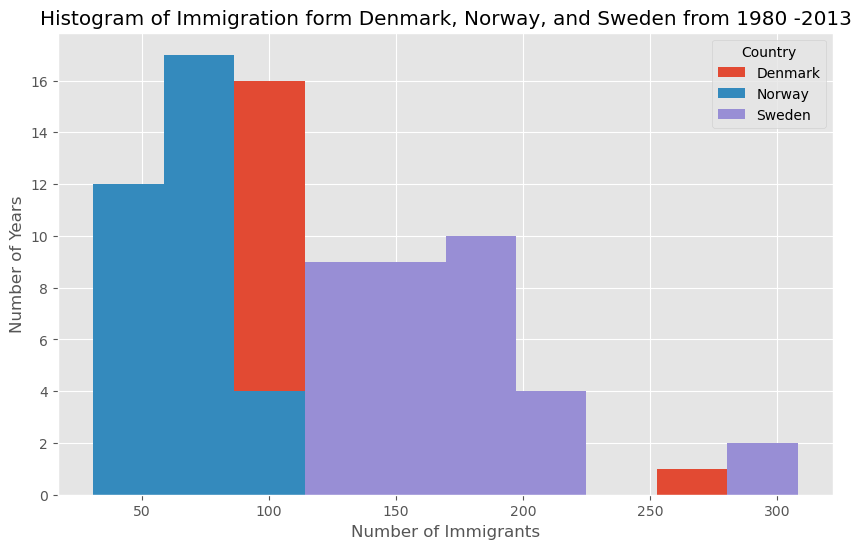

In [42]:
# Generating histogram:

df_t.plot(kind='hist', figsize=(10,6))

plt.title('Histogram of Immigration form Denmark, Norway, and Sweden from 1980 -2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()

###### 
Let's make a few modifications to improve the impact and aesthetics of the previous plot:

increase the bin size to 15 by passing in bins parameter;
set transparency to 60% by passing in alpha parameter;
label the x-axis by passing in x-label parameter;
change the colors of the plots by passing in color parameter.

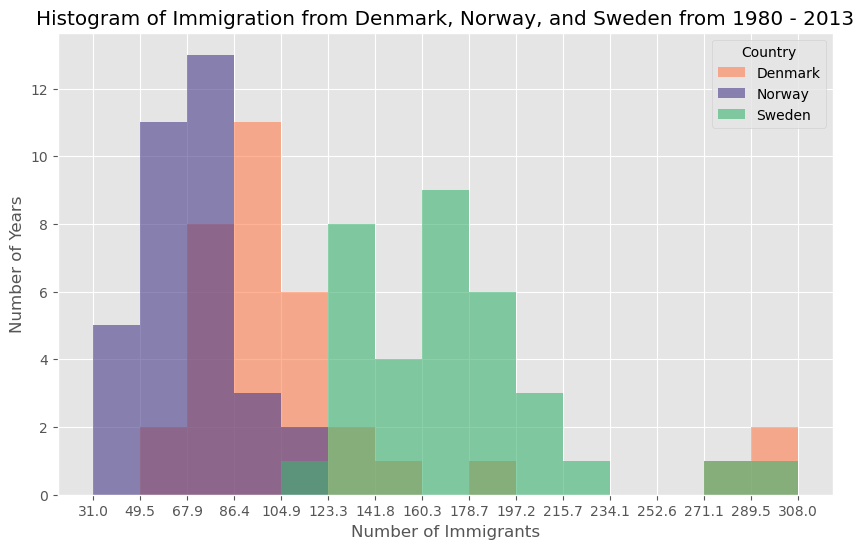

In [43]:
count, bin_edges = np.histogram(df_t, 15)

df_t.plot(kind = 'hist',
          figsize=(10,6),
          bins =15,
          alpha = 0.6,
          xticks = bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

###### 
The code below gives a full listing of colors available in Matplotlib:


In [ ]:
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

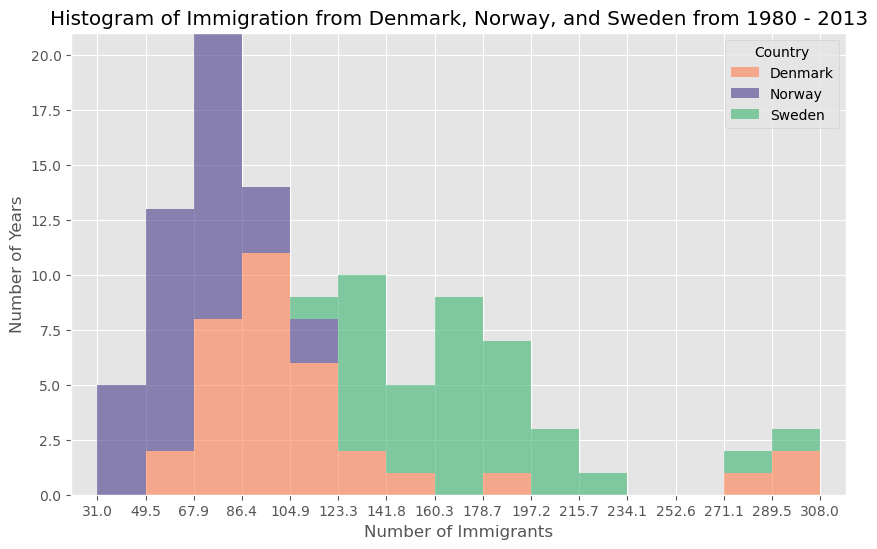

In [49]:
count, bin_edges = np.histogram(df_t, 15)

xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10

df_t.plot(kind = 'hist',
          figsize=(10,6),
          bins =15,
          alpha = 0.6,
          xticks = bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked = True,
          xlim = (xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [51]:

df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Greece,1065,953,897,633,580,584,547,765,564,773,...,120,100,74,110,107,119,101,102,146,298
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Bulgaria,24,20,12,33,11,24,33,52,43,85,...,2022,1738,1419,1172,994,784,556,365,451,512


In [55]:
df_k = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]

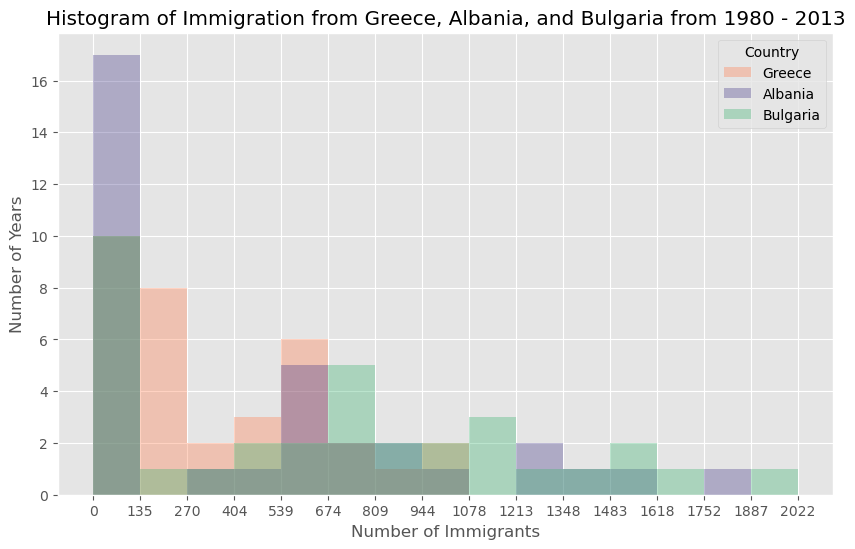

In [56]:

# transpose the dataframe
df_k = df_k.transpose() 

# let's get the x-tick values
count, bin_edges = np.histogram(df_k, 15)

# Un-stacked Histogram
df_k.plot(kind ='hist',
            figsize=(10, 6),
            bins=15,
            alpha=0.35,
            xticks=bin_edges,
            color=['coral', 'darkslateblue', 'mediumseagreen']
            )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()



###### 
#                  BAR CHARTS



###### To create a bar plot, we can use the code below:
    
     kind = bar (creates a vertical bar plot
     kind = barh (creates a horizontal bar plot

###### Analyzing ther Effect of Iceland's Finacial Crisis:

In [61]:

df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

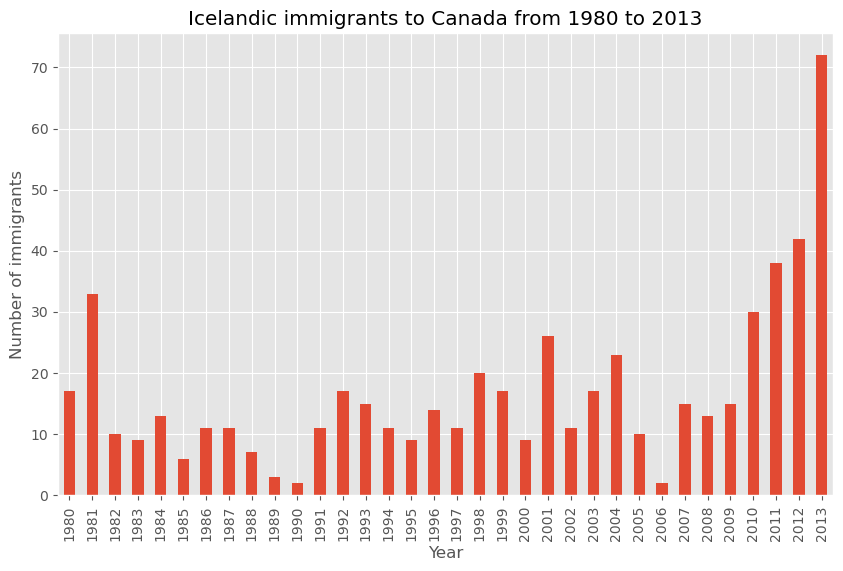

In [63]:

# Plot
df_iceland.plot(kind = 'bar', figsize = (10,6))

plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.title('Icelandic immigrants to Canada from 1980 to 2013')

plt.show()

######
#### Annotating on the plot using 'annotate' method of the scripting layer of the pyplot interface.

s: str, the text of annotation.

xy: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).

xytext: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).

xycoords: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).

arrowprops: Takes a dictionary of properties to draw the arrow:
arrowstyle: Specifies the arrow style, '->' is standard arrow.
connectionstyle: Specifies the connection type. arc3 is a straight line.
color: Specifies color of arrow.
lw: Specifies the line width.

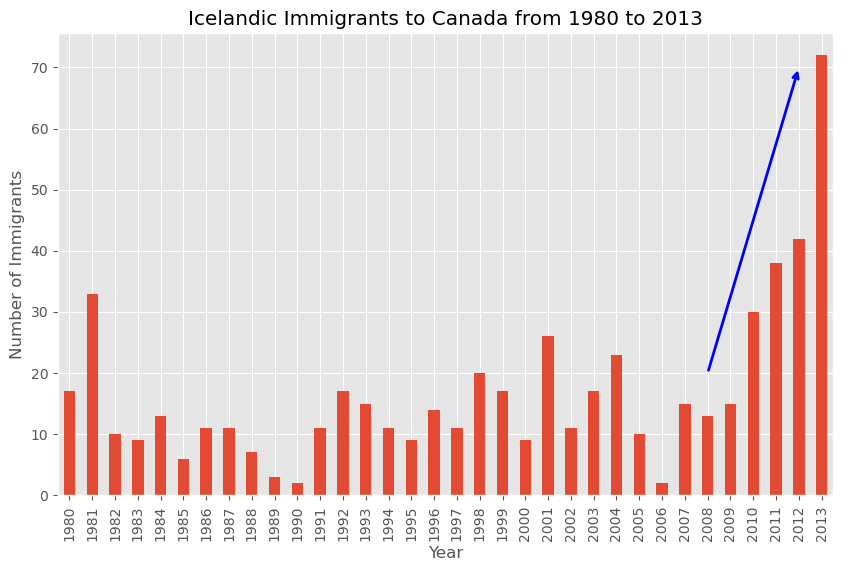

In [68]:
df_iceland.plot(kind='bar', figsize = (10,6), rot = 90) # rotates the xticsk(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('', # s: str. will be left blank for no text
             xy = (32, 70), 
             xytext=(28, 20),
             xycoords = 'data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )
plt.show()

##### Annotate a text to go over the arrow by passing in the following additional parameters:

rotation: rotation angle of text in degrees (counter clockwise)

va: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]

ha: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]

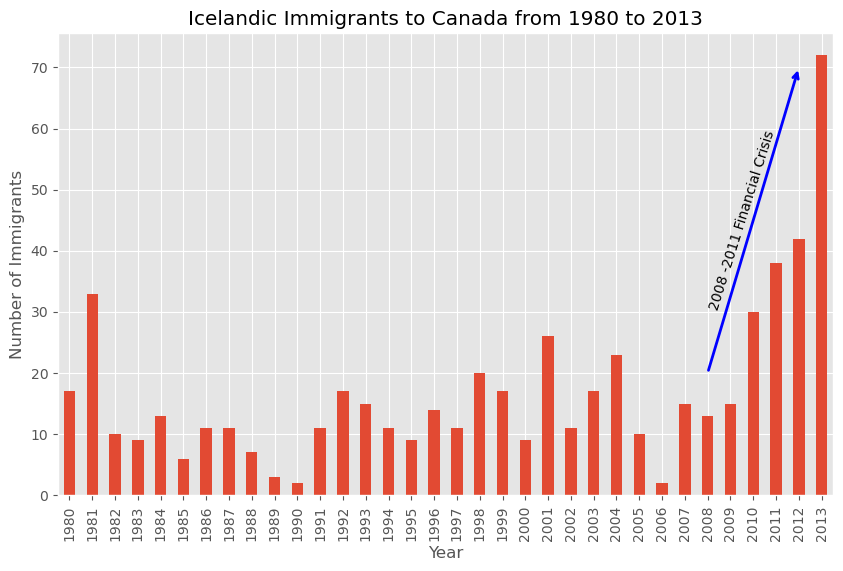

In [74]:
df_iceland.plot(kind='bar', figsize = (10,6), rot = 90) # rotates the xticsk(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('', # s: str. will be left blank for no text
             xy = (32, 70), 
             xytext=(28, 20),
             xycoords = 'data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 -2011 Financial Crisis', # text to display
             xy = (28,30), # starts text at point (year 2008, pop 30)
             rotation = 72.5,
             va = 'bottom',
             ha = 'left',
            )

plt.show()

### Horizontal Bar Plot

##### Using the scripting later and the df_can dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 -2013. Label each country with the total immigrant count.

In [75]:
# The data pertaining to the top 15 countries

df_can.sort_values(by = 'Total', ascending = True, inplace = True) # sort dataframe on 'Total' column (descending)

df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

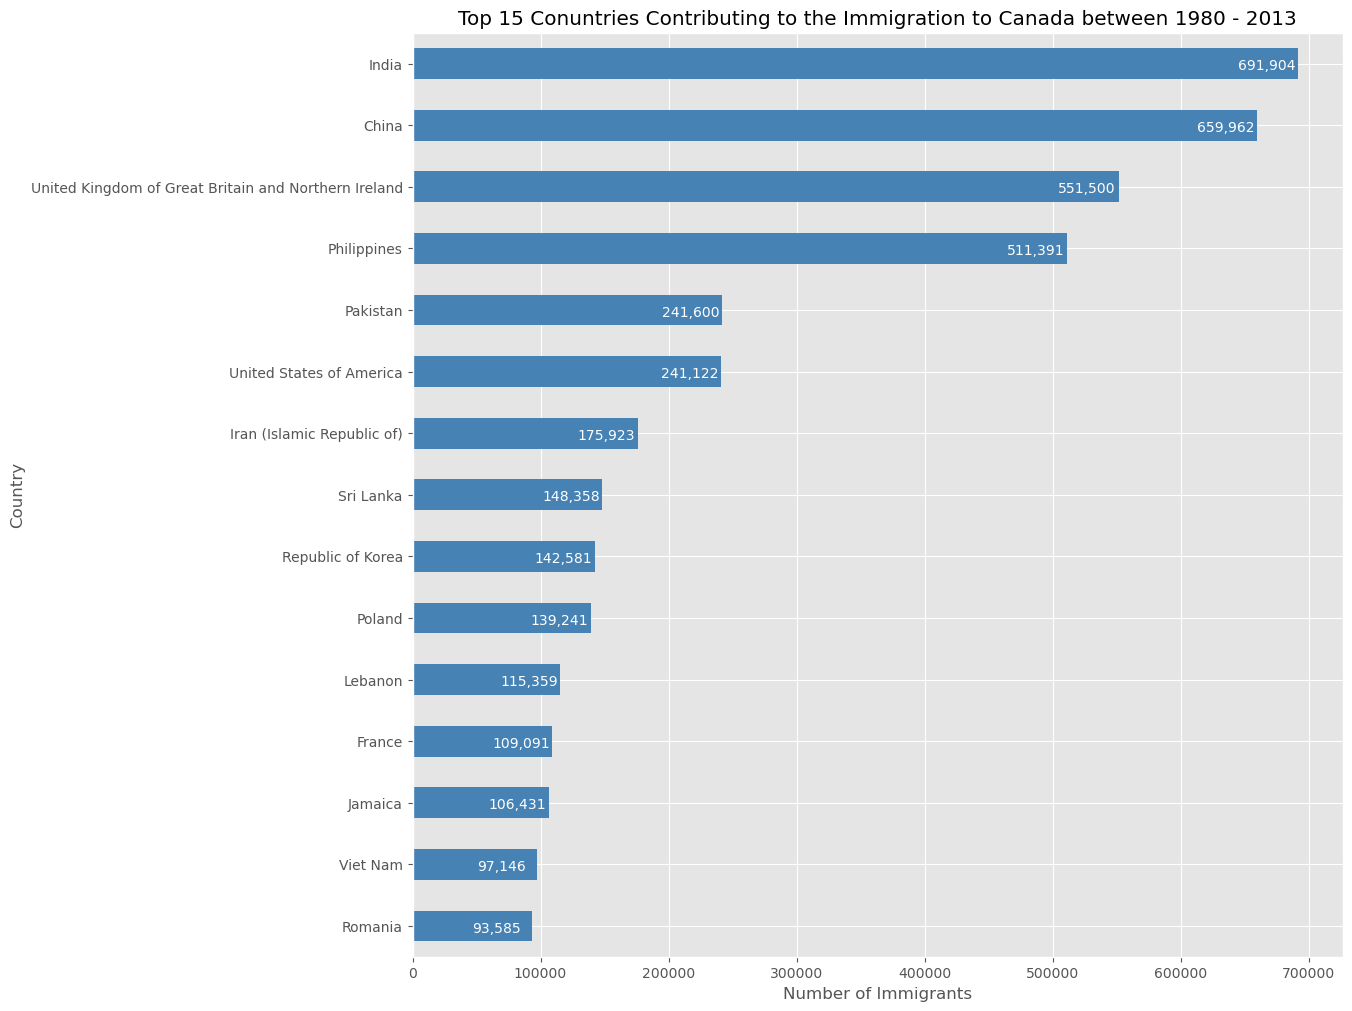

In [91]:

# Plot data:
df_top15.plot(kind = 'barh', color = 'steelblue', figsize=(12,12))

plt.ylabel('Country')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15):
    label = format(int(value), ',')# format int with commas
    
   # place text at the end of bar (subtracting 47000 from x, and 0.1 from y
    # to make it fit within the bar
    plt.annotate(label, xy=(value - 47000, index - 0.10),
                 color = "white")

plt.show()